In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
file_path = '/kaggle/input/urldata/data.csv' 

try:
    data = pd.read_csv(file_path)
    print("Dataset chargé avec succès !")
    print(f"Dimensions du dataset : {data.shape}")
    print("\nAperçu des premières lignes :")
    print(data.head())
    print(f"\nColonnes disponibles : {data.columns.tolist()}")
except FileNotFoundError:
    print(f"ERREUR : Le fichier '{file_path}' n'a pas été trouvé. Vérifie le chemin dans /kaggle/input/")
    print("Assure-toi d'avoir ajouté le dataset à ton notebook Kaggle via le menu 'Add data'.")
except Exception as e:
    print(f"Une erreur est survenue lors du chargement du CSV : {e}")

# 2. Sélectionner les colonnes nécessaires pour les modèles séquentiels
if 'data' in locals(): # Vérifie si 'data' a été chargé correctement
    if 'url' in data.columns and 'label' in data.columns:
        df_sequential = data[['url', 'label']].copy()
        print("\nColonnes 'url' et 'label' sélectionnées pour les modèles séquentiels.")
        print(df_sequential.head())
    else:
        print("ERREUR : Les colonnes 'url' et/ou 'label' sont manquantes dans le dataset.")

Dataset chargé avec succès !
Dimensions du dataset : (6728848, 60)

Aperçu des premières lignes :
                                     url  label                  source  \
0     irs-profilepaymentservice.com/home      1               phishtank   
1                       cpuggsukabumi.id      0        majestic_million   
2    members.tripod.com/~don_rc/ring.htm      0  data_clean_test_mendel   
3  optuswebmailadminprovider.weebly.com/      1               phishtank   
4                           topoz.com.pl      0            dmoz_harvard   

   url_has_login  url_has_client  url_has_server  url_has_admin  url_has_ip  \
0              0               0               0              0           0   
1              0               0               0              0           0   
2              0               0               0              0           0   
3              0               0               0              1           0   
4              0               0               0        

In [3]:
if 'df_sequential' in locals(): # S'assurer que df_sequential existe
    print("\n--- Nettoyage et Préparation des URLs ---")

    # Vérifier les valeurs manquantes dans les colonnes sélectionnées
    print(f"Valeurs manquantes dans 'url' avant nettoyage : {df_sequential['url'].isnull().sum()}")
    print(f"Valeurs manquantes dans 'label' avant nettoyage : {df_sequential['label'].isnull().sum()}")

    # Remplacer les NaN dans 'url' par une chaîne vide (si applicable, ton doc dit 0 NaN)
    # et s'assurer que toutes les URLs sont des chaînes
    df_sequential['url'] = df_sequential['url'].fillna('').astype(str)

    # Mettre toutes les URLs en minuscules
    df_sequential['url_processed'] = df_sequential['url'].str.lower()
    print("\nURLs converties en minuscules.")

    # Optionnel : Nettoyage des préfixes (http, https, www)
    # Pour l'instant, nous allons les garder car 'https' peut être un indicateur utile
    # que le modèle pourrait apprendre. Si tu veux tester sans :
    # def remove_prefixes(url_text):
    #     url_text = re.sub(r'^https?://', '', url_text)
    #     url_text = re.sub(r'^www\.', '', url_text)
    #     return url_text
    # df_sequential['url_processed'] = df_sequential['url_processed'].apply(remove_prefixes)
    # print("Préfixes http(s):// et www. supprimés (si activé).")

    print("\nAperçu des URLs après traitement minimal :")
    print(df_sequential[['url', 'url_processed', 'label']].head())

    # Extraire les listes de textes (URLs traitées) et les labels
    texts = df_sequential['url_processed'].tolist()
    labels = df_sequential['label'].values # Convertir en array numpy pour TensorFlow/Keras

    print(f"\nNombre d'URLs à tokeniser : {len(texts)}")
    print(f"Nombre de labels : {len(labels)}")
    print(f"Exemple de texte traité : '{texts[0]}', Label associé : {labels[0]}")

else:
    print("ERREUR : Le DataFrame 'df_sequential' n'a pas été créé. Vérifie la cellule précédente.")


--- Nettoyage et Préparation des URLs ---
Valeurs manquantes dans 'url' avant nettoyage : 0
Valeurs manquantes dans 'label' avant nettoyage : 0

URLs converties en minuscules.

Aperçu des URLs après traitement minimal :
                                     url  \
0     irs-profilepaymentservice.com/home   
1                       cpuggsukabumi.id   
2    members.tripod.com/~don_rc/ring.htm   
3  optuswebmailadminprovider.weebly.com/   
4                           topoz.com.pl   

                           url_processed  label  
0     irs-profilepaymentservice.com/home      1  
1                       cpuggsukabumi.id      0  
2    members.tripod.com/~don_rc/ring.htm      0  
3  optuswebmailadminprovider.weebly.com/      1  
4                           topoz.com.pl      0  

Nombre d'URLs à tokeniser : 6728848
Nombre de labels : 6728848
Exemple de texte traité : 'irs-profilepaymentservice.com/home', Label associé : 1


2025-05-07 15:33:52.457690: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746632032.695754      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746632032.763233      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered



--- Tokenisation et Padding ---


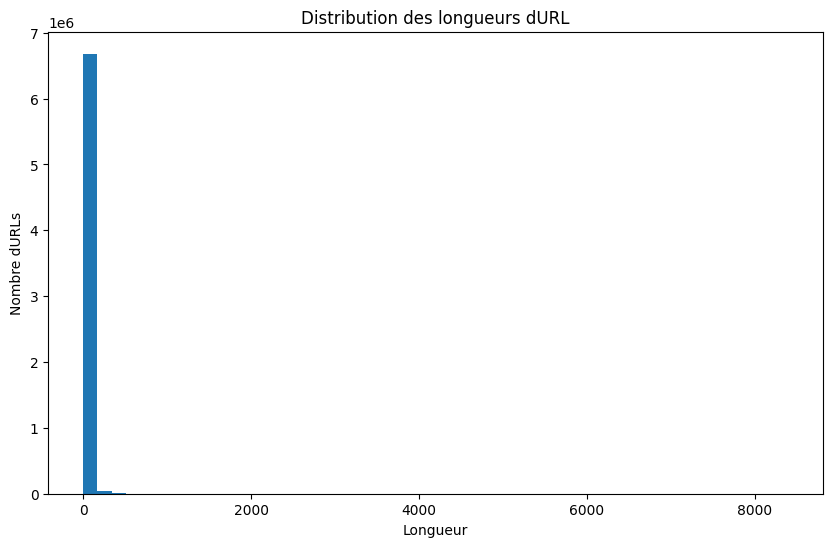

Longueur moyenne des URLs : 23.76
Longueur médiane des URLs : 18
Longueur max des URLs : 8394
95ème percentile des longueurs d'URL : 54

Vocabulaire de caractères trouvé : 156 caractères uniques.
Les 10 premiers caractères et leurs indices : {'<UNK>': 1, 'e': 2, 'o': 3, '.': 4, 'a': 5, 'c': 6, 'i': 7, 'r': 8, 's': 9, 't': 10}

Exemple d'URL originale : 'irs-profilepaymentservice.com/home'
URL tokenisée correspondante : [7, 8, 9, 24, 15, 8, 3, 21, 7, 13, 2, 15, 5, 23, 11, 2, 12, 10, 9, 2, 8, 26, 7, 6, 2, 4, 6, 3, 11, 17, 18, 3, 11, 2]

Forme des données paddées (X) : (6728848, 60)
Forme des labels (y) : (6728848,)

Exemple de séquence paddée :
[ 7  8  9 24 15  8  3 21  7 13  2 15  5 23 11  2 12 10  9  2  8 26  7  6
  2  4  6  3 11 17 18  3 11  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]

Taille du vocabulaire à utiliser pour la couche Embedding : 157


In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt # Pour visualiser la distribution des longueurs

if 'texts' in locals() and 'labels' in locals(): # S'assurer que texts et labels existent
    print("\n--- Tokenisation et Padding ---")

    # 1. Paramètres pour la tokenisation et le padding
    MAX_NUM_CHARS = 20000  # Nombre maximal de caractères uniques à considérer dans le vocabulaire
                           # Ajuste si nécessaire, mais pour les caractères c'est souvent moins
    MAX_SEQUENCE_LENGTH = 60 # Longueur maximale d'une URL après padding/troncature
                              # C'est un hyperparamètre important à choisir
    EMBEDDING_DIM = 100     # Dimension des embeddings (sera utilisé plus tard dans le modèle)

    # Afficher la distribution des longueurs des URLs pour aider à choisir MAX_SEQUENCE_LENGTH
    url_lengths = [len(s) for s in texts]
    plt.figure(figsize=(10, 6))
    plt.hist(url_lengths, bins=50)
    plt.title('Distribution des longueurs d''URL')
    plt.xlabel('Longueur')
    plt.ylabel('Nombre d''URLs')
    plt.show()
    print(f"Longueur moyenne des URLs : {np.mean(url_lengths):.2f}")
    print(f"Longueur médiane des URLs : {np.median(url_lengths):.0f}")
    print(f"Longueur max des URLs : {np.max(url_lengths)}")
    percentile_95 = np.percentile(url_lengths, 95)
    print(f"95ème percentile des longueurs d'URL : {percentile_95:.0f}")
    # Ajuste MAX_SEQUENCE_LENGTH en fonction de cette distribution.
    # Par exemple, tu pourrais prendre le 95ème percentile ou une valeur un peu au-dessus.
    # MAX_SEQUENCE_LENGTH = int(percentile_95) # Par exemple


    # 2. Créer et ajuster le Tokenizer au niveau des caractères
    # char_level=True est la clé ici !
    # oov_token est utile pour les caractères qui ne sont pas dans le vocabulaire appris
    tokenizer = Tokenizer(num_words=MAX_NUM_CHARS, char_level=True, oov_token="<UNK>")
    tokenizer.fit_on_texts(texts) # Apprend le vocabulaire à partir de toutes nos URLs

    # Afficher la taille du vocabulaire
    word_index = tokenizer.word_index # C'est en fait char_index ici
    print(f"\nVocabulaire de caractères trouvé : {len(word_index)} caractères uniques.")
    print(f"Les {min(10, len(word_index))} premiers caractères et leurs indices : {dict(list(word_index.items())[:10])}")

    # 3. Convertir les textes (URLs) en séquences d'entiers
    sequences = tokenizer.texts_to_sequences(texts)
    print(f"\nExemple d'URL originale : '{texts[0]}'")
    print(f"URL tokenisée correspondante : {sequences[0]}")

    # 4. Appliquer le Padding aux séquences
    # 'post' signifie que le padding est ajouté à la fin.
    # 'post' pour truncating signifie qu'on coupe à la fin si trop long.
    data_padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

    print(f"\nForme des données paddées (X) : {data_padded.shape}") # Devrait être (nombre_urls, MAX_SEQUENCE_LENGTH)
    print(f"Forme des labels (y) : {labels.shape}")
    print(f"\nExemple de séquence paddée :")
    print(data_padded[0])

    # Les données finales pour l'entraînement sont :
    # X_train_seq = data_padded
    # y_train_seq = labels (qui est déjà un array numpy)

    # La taille du vocabulaire pour la couche Embedding sera len(word_index) + 1
    # (le +1 est pour le token de padding 0, si Tokenizer ne le gère pas implicitement,
    # ce qui est le cas pour char_level=True, 0 est réservé et non utilisé par Tokenizer par défaut)
    # Ou plus précisément, on peut utiliser `max(word_index.values()) + 1` si on veut être sûr,
    # ou s'en tenir à MAX_NUM_CHARS si on limite le vocabulaire.
    # Pour char_level, c'est plus simple : la taille du vocabulaire est len(word_index) + 1
    # car 0 est implicitement réservé au padding par pad_sequences.
    vocab_size = len(word_index) + 1 # +1 pour le token de padding 0
    print(f"\nTaille du vocabulaire à utiliser pour la couche Embedding : {vocab_size}")


else:
    print("ERREUR : Les variables 'texts' et/ou 'labels' n'ont pas été créées. Vérifie la cellule précédente.")

In [5]:
if 'data_padded' in locals() and 'texts' in locals() and 'tokenizer' in locals():
    print("\n--- Vérifications Post-Tokenisation et Padding ---")

    # 1. Vérifier la forme des données
    print(f"Forme de data_padded (X) : {data_padded.shape}") # Doit être (nb_urls, MAX_SEQUENCE_LENGTH)
    print(f"Forme des labels (y) : {labels.shape}")      # Doit être (nb_urls,)

    # 2. Vérifier quelques exemples de reconversion (dé-tokenisation)
    # Cela aide à s'assurer que le mapping est correct et que le padding/troncature est logique
    num_examples_to_check = 3
    for i in range(num_examples_to_check):
        original_url = texts[i]
        tokenized_sequence = data_padded[i]

        # Reconstruire l'URL à partir de la séquence d'entiers
        # On a besoin de l'index inversé (entier -> caractère)
        #tokenizer.index_word contient les indices à partir de 1.
        # 0 est réservé au padding. '<UNK>' a son propre indice.
        reverse_word_index = {value: key for key, value in tokenizer.word_index.items()}

        # Filtrer les tokens de padding (0) avant de reconstruire
        decoded_chars = [reverse_word_index.get(token_id, '') for token_id in tokenized_sequence if token_id != 0]
        reconstructed_url_no_padding = "".join(decoded_chars)

        print(f"\nExemple {i+1}:")
        print(f"  URL Originale (traitée)    : '{original_url}' (longueur: {len(original_url)})")
        print(f"  Séquence Paddée (premiers 30 tokens) : {tokenized_sequence[:30]}...")
        print(f"  URL Reconstruite (sans padding): '{reconstructed_url_no_padding}'")

        # Vérifier la longueur par rapport à MAX_SEQUENCE_LENGTH
        if len(original_url) > MAX_SEQUENCE_LENGTH:
            print(f"  NOTE: L'URL originale était plus longue que MAX_SEQUENCE_LENGTH ({MAX_SEQUENCE_LENGTH}) et a été tronquée.")
        elif len(reconstructed_url_no_padding) < len(original_url) and len(original_url) <= MAX_SEQUENCE_LENGTH :
             print(f"  NOTE: L'URL reconstruite est plus courte que l'originale avant padding. Cela peut arriver si des caractères OOV ont été mappés à '' (si on n'utilise pas de token <UNK> explicite dans la reconstruction).")


    # 3. Vérifier la présence de tokens de padding (0)
    # Compter le nombre de zéros dans une séquence paddée d'une URL qui était initialement courte
    short_url_index = -1
    for idx, url_text in enumerate(texts):
        if len(url_text) < MAX_SEQUENCE_LENGTH // 2 and len(url_text) > 0: # Cherche une URL relativement courte
            short_url_index = idx
            break
    
    if short_url_index != -1:
        print(f"\nExemple d'URL courte (index {short_url_index}) : '{texts[short_url_index]}'")
        print(f"  Sa séquence paddée : {data_padded[short_url_index]}")
        print(f"  Nombre de zéros (padding) dans cette séquence : {np.sum(data_padded[short_url_index] == 0)}")
    else:
        print("\nPas trouvé d'URL suffisamment courte pour un test de padding clair.")

    # 4. Vérifier l'utilisation du token OOV (<UNK>) si des URLs contiennent des caractères non appris
    # C'est moins probable avec char_level=True si fit_on_texts est fait sur tout le dataset de caractères,
    # mais si tu avais limité MAX_NUM_CHARS ou si tu avais un set de test avec des caractères vraiment nouveaux.
    if "<UNK>" in tokenizer.word_index:
        unk_token_id = tokenizer.word_index["<UNK>"]
        print(f"\nL'indice du token <UNK> est : {unk_token_id}")
        # Tu pourrais chercher des séquences contenant ce token_id si tu t'y attends.
    else:
        print("\nLe token <UNK> n'est pas dans le vocabulaire (ce qui est normal si tous les caractères ont été appris).")

else:
    print("ERREUR : Les variables nécessaires pour la vérification n'existent pas.")


--- Vérifications Post-Tokenisation et Padding ---
Forme de data_padded (X) : (6728848, 60)
Forme des labels (y) : (6728848,)

Exemple 1:
  URL Originale (traitée)    : 'irs-profilepaymentservice.com/home' (longueur: 34)
  Séquence Paddée (premiers 30 tokens) : [ 7  8  9 24 15  8  3 21  7 13  2 15  5 23 11  2 12 10  9  2  8 26  7  6
  2  4  6  3 11 17]...
  URL Reconstruite (sans padding): 'irs-profilepaymentservice.com/home'

Exemple 2:
  URL Originale (traitée)    : 'cpuggsukabumi.id' (longueur: 16)
  Séquence Paddée (premiers 30 tokens) : [ 6 15 16 19 19  9 16 22  5 20 16 11  7  4  7 14  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]...
  URL Reconstruite (sans padding): 'cpuggsukabumi.id'

Exemple 3:
  URL Originale (traitée)    : 'members.tripod.com/~don_rc/ring.htm' (longueur: 35)
  Séquence Paddée (premiers 30 tokens) : [11  2 11 20  2  8  9  4 10  8  7 15  3 14  4  6  3 11 17 46 14  3 12 42
  8  6 17  8  7 12]...
  URL Reconstruite (sans padding): 'members.tripod.com/~don_rc/ring.

In [6]:
from sklearn.model_selection import train_test_split

if 'data_padded' in locals() and 'labels' in locals():
    print("\n--- Division des Données en Ensembles d'Entraînement et de Test ---")

    # X sont tes séquences paddées, y sont tes labels
    X = data_padded
    y = labels

    # Diviser en entraînement (ex: 80%) et test (ex: 20%)
    # random_state assure la reproductibilité
    # stratify=y est une bonne pratique pour les problèmes de classification,
    # surtout si les classes sont déséquilibrées, pour s'assurer que
    # la proportion des classes est similaire dans les ensembles train et test.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,       # 20% pour le test
        random_state=42,     # Pour la reproductibilité
        stratify=y           # Recommandé pour la classification
    )

    print(f"Forme de X_train : {X_train.shape}")
    print(f"Forme de y_train : {y_train.shape}")
    print(f"Forme de X_test  : {X_test.shape}")
    print(f"Forme de y_test  : {y_test.shape}")

    print("\nDistribution des labels dans l'ensemble d'entraînement :")
    unique_train, counts_train = np.unique(y_train, return_counts=True)
    print(dict(zip(unique_train, counts_train)))

    print("\nDistribution des labels dans l'ensemble de test :")
    unique_test, counts_test = np.unique(y_test, return_counts=True)
    print(dict(zip(unique_test, counts_test)))

    # Optionnel : Si tu veux aussi un ensemble de validation distinct (ex: à partir de l'ensemble d'entraînement)
    # X_train_final, X_val, y_train_final, y_val = train_test_split(
    #     X_train, y_train,
    #     test_size=0.1, # Par exemple 10% de l'ensemble d'entraînement initial pour la validation
    #     random_state=42,
    #     stratify=y_train
    # )
    # print(f"\nForme de X_train_final : {X_train_final.shape}")
    # print(f"Forme de X_val       : {X_val.shape}")

else:
    print("ERREUR : Les variables 'data_padded' et/ou 'labels' n'ont pas été créées.")


--- Division des Données en Ensembles d'Entraînement et de Test ---
Forme de X_train : (5383078, 60)
Forme de y_train : (5383078,)
Forme de X_test  : (1345770, 60)
Forme de y_test  : (1345770,)

Distribution des labels dans l'ensemble d'entraînement :
{0: 4226540, 1: 1156538}

Distribution des labels dans l'ensemble de test :
{0: 1056635, 1: 289135}


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

if 'X_train' in locals(): # S'assurer que les données d'entraînement existent
    print("\n--- Construction et Entraînement du Modèle CNN 1D ---")

    # Paramètres du modèle (rappel ou à définir ici si non globales)
    # vocab_size = 157 # D'après ta sortie précédente (len(word_index) + 1)
    # MAX_SEQUENCE_LENGTH = 60 # D'après ta sortie précédente
    EMBEDDING_DIM = 100 # Choisis une dimension, ex: 50, 100, ou 128

    # S'assurer que vocab_size et MAX_SEQUENCE_LENGTH sont bien définies
    # Si elles étaient dans une autre cellule et que tu as redémarré le kernel,
    # tu devras peut-être les redéfinir ou récupérer leurs valeurs.
    # Pour l'instant, on suppose qu'elles sont accessibles.
    # Si ce n'est pas le cas, décommente et ajuste les lignes ci-dessus.

    print(f"Utilisation de vocab_size: {vocab_size}")
    print(f"Utilisation de MAX_SEQUENCE_LENGTH: {MAX_SEQUENCE_LENGTH}")
    print(f"Utilisation de EMBEDDING_DIM: {EMBEDDING_DIM}")

    # Construction du modèle CNN 1D
    model_cnn = Sequential([
        Embedding(input_dim=vocab_size, # Taille du vocabulaire
                  output_dim=EMBEDDING_DIM, # Dimension de l'embedding
                  input_length=MAX_SEQUENCE_LENGTH), # Longueur de la séquence d'entrée
        Conv1D(filters=128, kernel_size=5, activation='relu'), # Couche de convolution
        GlobalMaxPooling1D(), # Pooling pour réduire la dimensionnalité
        Dense(64, activation='relu'), # Couche dense
        Dropout(0.5), # Dropout pour la régularisation
        Dense(1, activation='sigmoid') # Couche de sortie pour classification binaire
    ])

    # Compilation du modèle
    model_cnn.compile(optimizer='adam',
                      loss='binary_crossentropy', # Pour la classification binaire
                      metrics=['accuracy']) # Suivre l'accuracy

    # Afficher le résumé du modèle
    model_cnn.summary()

    # Entraînement du modèle
    print("\nDébut de l'entraînement du modèle CNN...")
    # EarlyStopping pour arrêter l'entraînement si la performance sur la validation ne s'améliore plus
    # (Utile si tu as un ensemble de validation, sinon on peut s'en passer pour un premier test)
    # early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Pour un premier test, entraînons sans ensemble de validation dédié ici,
    # on utilisera X_test pour l'évaluation finale.
    # Si tu as créé X_val, y_val, utilise validation_data=(X_val, y_val)
    history_cnn = model_cnn.fit(
        X_train, y_train,
        epochs=10,           # Nombre d'époques (à ajuster)
        batch_size=128,      # Taille du batch (à ajuster)
        validation_split=0.1, # Utilise 10% des données d'entraînement pour la validation pendant l'entraînement
        # callbacks=[early_stopping] # Décommente si tu utilises EarlyStopping et un val_set
    )

    print("\nEntraînement du modèle CNN terminé.")

    # Évaluation du modèle sur l'ensemble de test (sera fait plus en détail après)
    print("\nÉvaluation préliminaire sur l'ensemble de test :")
    loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test, y_test, verbose=0)
    print(f"Loss sur le test (CNN) : {loss_cnn:.4f}")
    print(f"Accuracy sur le test (CNN) : {accuracy_cnn:.4f}")

else:
    print("ERREUR : Les données d'entraînement (X_train, etc.) n'ont pas été créées.")


--- Construction et Entraînement du Modèle CNN 1D ---
Utilisation de vocab_size: 157
Utilisation de MAX_SEQUENCE_LENGTH: 60
Utilisation de EMBEDDING_DIM: 100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-05-07 15:36:01.827955: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Début de l'entraînement du modèle CNN...
Epoch 1/10
37850/37850 ━━━━━━━━━━━━━━━━━━━━ 1246s 33ms/step - accuracy: 0.9405 - loss: 0.1822 - val_accuracy: 0.9575 - val_loss: 0.1375
Epoch 2/10
37850/37850 ━━━━━━━━━━━━━━━━━━━━ 1261s 33ms/step - accuracy: 0.9559 - loss: 0.1433 - val_accuracy: 0.9597 - val_loss: 0.1316
Epoch 3/10
37850/37850 ━━━━━━━━━━━━━━━━━━━━ 1267s 33ms/step - accuracy: 0.9582 - loss: 0.1372 - val_accuracy: 0.9599 - val_loss: 0.1306
Epoch 4/10
37850/37850 ━━━━━━━━━━━━━━━━━━━━ 1284s 34ms/step - accuracy: 0.9593 - loss: 0.1343 - val_accuracy: 0.9611 - val_loss: 0.1281
Epoch 5/10
37850/37850 ━━━━━━━━━━━━━━━━━━━━ 1269s 34ms/step - accuracy: 0.9597 - loss: 0.1330 - val_accuracy: 0.9615 - val_loss: 0.1286
Epoch 6/10
37850/37850 ━━━━━━━━━━━━━━━━━━━━ 1276s 34ms/step - accuracy: 0.9602 - loss: 0.1316 - val_accuracy: 0.9619 - val_loss: 0.1261
Epoch 7/10
37850/37850 ━━━━━━━━━━━━━━━━━━━━ 1325s 35ms/step - accuracy: 0.9607 - loss: 0.1300 - val_accuracy: 0.9619 - val_loss: 0.1265
Epoch 

In [8]:
import os
print(os.listdir('/kaggle/input/urldata/'))

['data.csv']
